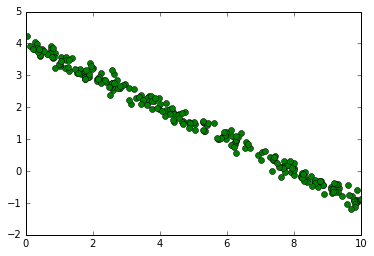

In [5]:
%matplotlib inline

import cPickle as pickle
import pylab

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_1.txt', 'rb') as f:
    x, y = pickle.load(f)
pylab.plot(x, y, 'go')

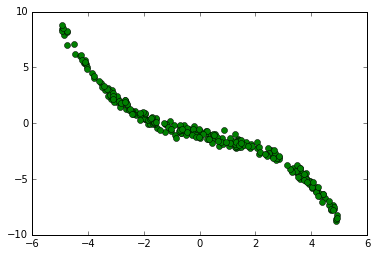

In [7]:
%matplotlib inline

import cPickle as pickle
import pylab

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_2.txt', 'rb') as f:
    x, y = pickle.load(f)
pylab.plot(x, y, 'go')

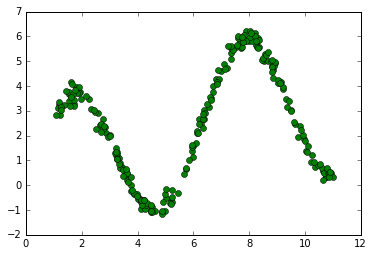

In [11]:
%matplotlib inline

import cPickle as pickle
import pylab

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_3.txt', 'rb') as f:
    x, y = pickle.load(f)
pylab.plot(x, y, 'go')

In [15]:
__author__ = 'Nikita Rybkin'

import numpy
import math
import cPickle as pickle
import pylab


def corr(data1, data2):
    mean1 = data1.mean()
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

def linear_regression(x, y):
    m = x.shape[0]
    matrix = numpy.ndarray(shape=(m, 2))
    for j in range(m):
        matrix[j, 0] = 1
        matrix[j, 1] = x[j].tolist()[0]
    b = beta_counter(matrix, y)
    def f(t):
        p = b[0] + b[1] * t
        return p
    return f

def beta_counter(x, y):
    b = numpy.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return b

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_1.txt', 'rb') as f:
    x, y = pickle.load(f)
print (corr(linear_regression(x,y)(x), y))

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_2.txt', 'rb') as f:
    x, y = pickle.load(f)
print (corr(linear_regression(x,y)(x), y))

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_3.txt', 'rb') as f:
    x, y = pickle.load(f)
print (corr(linear_regression(x,y)(x), y))

0.994752241247
0.958568472949
0.240018556804


In [19]:
__author__ = 'Nikita Rybkin'

import numpy
import math
import cPickle as pickle
import pylab


def corr(data1, data2):
    mean1 = data1.mean()
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

def polynomial_regression(x, y, k):
    m = x.shape[0]
    matrix = numpy.ndarray(shape=(m, k + 1))
    for j in range(m):
        matrix[j, 0] = 1
        for z in range(1, k + 1):
            matrix[j, z] = x[j].tolist()[0] ** z
    b = beta_counter(matrix, y)
    def f(t):
        p = 0
        for i in range(k + 1):
            p += b[i] * (t ** i)
        return p
    return f

def beta_counter(x, y):
    b = numpy.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return b

def cor_p (x,y,n):
    return corr(polynomial_regression(x,y,n)(x), y)

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_1.txt', 'rb') as f:
    x, y = pickle.load(f)
    
cor = cor_p (x,y,2)
print (cor)
n = 3
cor1 = cor_p (x,y,n)
while (cor1 > cor):
    print (cor1)
    cor = cor1
    n += 1
    cor1 = cor_p(x,y,n)
print ("\nn = "+str(n)+"\n---------------")

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_2.txt', 'rb') as f:
    x, y = pickle.load(f)
cor = cor_p (x,y,2)
print (cor)
n = 3
cor1 = cor_p (x,y,n)
while (cor1 > cor):
    print (cor1)
    cor = cor1
    n += 1
    cor1 = cor_p(x,y,n)
print ("\nn = "+str(n)+"\n---------------")

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_3.txt', 'rb') as f:
    x, y = pickle.load(f)
cor = cor_p (x,y,2)
print (cor)
n = 3
cor1 = cor_p (x,y,n)
while (cor1 > cor):
    print (cor1)
    cor = cor1
    n += 1
    cor1 = cor_p(x,y,n)
print ("\nn = "+str(n)+"\n---------------")

0.994767717095
0.99477439395
0.994809553163
0.99481120365
0.994829158434
0.994871923104
0.994911579903
0.994927940713
0.994984731839

n = 11
---------------
0.961714291359
0.996433790485
0.996433938383
0.996433971736
0.996442206852
0.996454727783
0.996464454515
0.996475427757
0.99649423684
0.996499048796
0.996511222965
0.996536348135
0.996561414861
0.996567245219
0.996567271675
0.99656734525
0.996567731447
0.996572348129
0.996586922998

n = 21
---------------
0.240633519151
0.867031625181
0.88651290741
0.989425792458
0.99184778485
0.995730807729
0.995778117785
0.995848215037

n = 10
---------------


In [33]:
__author__ = 'Nikita Rybkin'

import numpy
import math
import cPickle as pickle
import pylab


def corr(data1, data2):
    mean1 = data1.mean()
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

def vector_operator(f, v):
    z = numpy.ndarray(v.shape)
    for i in range(len(v)):
        z[i] = f(v[i])
    return z

def functional_regression(x, y, functions):
    m = x.shape[0]
    functions = numpy.concatenate(([id], functions))
    k = len(functions)
    matrix = numpy.ndarray(shape=(m, k))
    for j in range(m):
        for z in range(k):
            matrix[j, z] = functions[z](x[j].tolist()[0])
    b = beta_counter(matrix, y)
    def f(t):
        p = 0
        for i in range(k):

            p += b[i] * vector_operator(functions[i], t)
        return p
    return f


def beta_counter(x, y):
    b = numpy.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return b

def sqr(x):
    return x**2

def eq(x):
    return x

def id(x):
    return 1

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_1.txt', 'rb') as f:
    x, y = pickle.load(f)
print (corr(functional_regression(x,y,[math.sqrt])(x), y))

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_2.txt', 'rb') as f:
    x, y = pickle.load(f)
print (corr(functional_regression(x,y, [math.cos, math.sin])(x), y))

with open('/root/PycharmProjects/homeTasks/lab2/task2_dataset_3.txt', 'rb') as f:
    x, y = pickle.load(f)
print (corr(functional_regression(x,y, [math.cos, math.sin])(x), y))

0.976974682129
0.3943182495
0.910924457501
